<a href="https://colab.research.google.com/github/ashjain4211/imageclassification/blob/master/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayushi4211","key":"383511ed4cad3d1b369e23ec32ebfbc3"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
 
!chmod 600 ~/.kaggle/kaggle.json
 


In [6]:
!kaggle datasets download -d valentynsichkar/cifar10-preprocessed

 98% 1.12G/1.14G [00:32<00:01, 23.1MB/s]
100% 1.14G/1.14G [00:32<00:00, 38.1MB/s]


In [7]:
from zipfile import ZipFile
file_name="cifar10-preprocessed.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [8]:
'./get_CIFAR-10.sh'


'./get_CIFAR-10.sh'

In [0]:
import tensorflow as tf

In [11]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 13s 0us/step


In [12]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [13]:
import os
import numpy as np

from matplotlib import pyplot as  plt
%matplotlib inline

print('tensorflow version:',tf.__version__)
print('is using gpu',tf.test.is_gpu_available())

tensorflow version: 2.2.0-rc4
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
is using gpu True


In [0]:
def get_three_classes(x,y):
  indices_0, _=np.where(y==0)
  indices_1, _=np.where(y==1)
  indices_2, _=np.where(y==2)

  indices=np.concatenate([indices_0,indices_1,indices_2],axis=0)

  x=x[indices]
  y=y[indices]

  count=x.shape[0]
  indices=np.random.choice(range(count),count,replace=False)

  x=x[indices]
  y=y[indices]

  y=tf.keras.utils.to_categorical(y)

  return x,y




In [15]:
(x_train,y_train)=get_three_classes(x_train,y_train)
(x_test,y_test)=get_three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


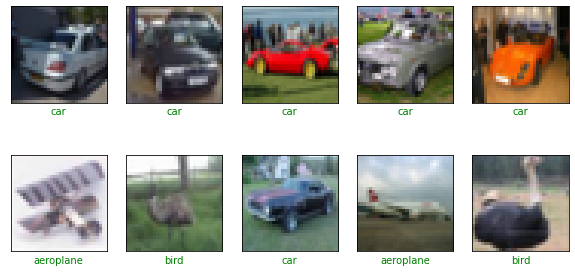

In [20]:
class_names=['aeroplane','car','bird']

def show_random_examples(x,y,p):
  indices=np.random.choice(range(x.shape[0]),10,replace=False)
  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])],color=col)
  plt.show()

show_random_examples(x_train,y_train,y_train)

In [23]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense

def create_model():
  def add_conv_block(model,num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))

  
  model=add_conv_block(model,32)
  model=add_conv_block(model,64)
  model=add_conv_block(model,128)

  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))

  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',metrics=['accuracy']
  )
  return model

model=create_model()
model.summary()

    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

In [31]:
h=model.fit(
    x_train/255.,y_train,
    validation_data=(x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
               tf.keras.callbacks.ModelCheckpoint(
                   'models/model_{val_accuracy:.3f}.h5',
                   save_best_only=True,save_weights=False,
                   monitor='val_accuracy'
               )
    ]
)

Epoch 1/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1435 - accuracy: 0.9456 - val_loss: 3.3458 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1360 - accuracy: 0.9483 - val_loss: 2.2636 - val_accuracy: 0.3333
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1425 - accuracy: 0.9462 - val_loss: 2.1242 - val_accuracy: 0.3337
Epoch 4/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1300 - accuracy: 0.9494 - val_loss: 1.0742 - val_accuracy: 0.6017
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1309 - accuracy: 0.9472 - val_loss: 0.3271 - val_accuracy: 0.8833
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1263 - accuracy: 0.9517 - val_loss: 0.1959 - val_accuracy: 0.9330
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1233 - accuracy: 0.9520 - val_loss: 0.1975 - val_accuracy: 0.9307

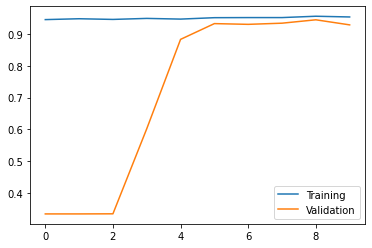

In [32]:
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()


In [0]:
preds=model.predict(x_test/255.)

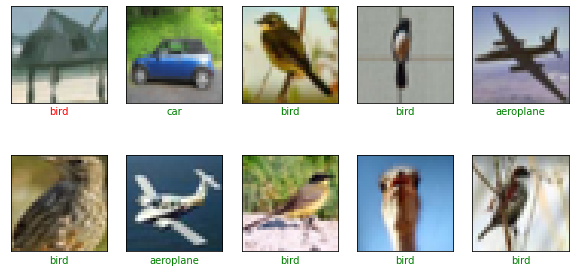

In [37]:
show_random_examples(x_test,y_test,preds)